In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
data.drop(['tip', 'sex'], axis = 1, inplace=True)
data.head()

,total_bill,smoker,day,time,size
0,16.99,No,Sun,Dinner,2
1,10.34,No,Sun,Dinner,3
2,21.01,No,Sun,Dinner,3
3,23.68,No,Sun,Dinner,2
4,24.59,No,Sun,Dinner,4


In [5]:
#Primeras filas del dataset
print(data.head())

   total_bill smoker  day    time  size
0       16.99     No  Sun  Dinner     2
1       10.34     No  Sun  Dinner     3
2       21.01     No  Sun  Dinner     3
3       23.68     No  Sun  Dinner     2
4       24.59     No  Sun  Dinner     4


In [6]:
#Informacion generla del dataset
print(data.info)

<bound method DataFrame.info of      total_bill smoker   day    time  size
0         16.99     No   Sun  Dinner     2
1         10.34     No   Sun  Dinner     3
2         21.01     No   Sun  Dinner     3
3         23.68     No   Sun  Dinner     2
4         24.59     No   Sun  Dinner     4
..          ...    ...   ...     ...   ...
239       29.03     No   Sat  Dinner     3
240       27.18    Yes   Sat  Dinner     2
241       22.67    Yes   Sat  Dinner     2
242       17.82     No   Sat  Dinner     2
243       18.78     No  Thur  Dinner     2

[244 rows x 5 columns]>


In [7]:
#Estadistica descriptiva
print(data.describe(include='all'))

        total_bill smoker  day    time        size
count   244.000000    244  244     244  244.000000
unique         NaN      2    4       2         NaN
top            NaN     No  Sat  Dinner         NaN
freq           NaN    151   87     176         NaN
mean     19.785943    NaN  NaN     NaN    2.569672
std       8.902412    NaN  NaN     NaN    0.951100
min       3.070000    NaN  NaN     NaN    1.000000
25%      13.347500    NaN  NaN     NaN    2.000000
50%      17.795000    NaN  NaN     NaN    2.000000
75%      24.127500    NaN  NaN     NaN    3.000000
max      50.810000    NaN  NaN     NaN    6.000000


In [8]:
#Verifica valores nulos
print(data.isnull().sum())

total_bill    0
smoker        0
day           0
time          0
size          0
dtype: int64


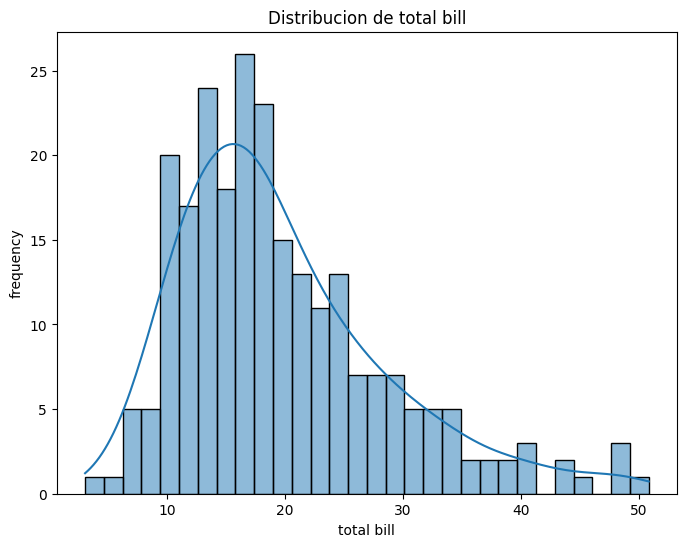

In [9]:
#Distribucion de la variable 'total bill'
plt.figure(figsize=(8,6))
sns.histplot(data['total_bill'], kde=True, bins=30)
plt.title('Distribucion de total bill')
plt.xlabel('total bill')
plt.ylabel('frequency')
plt.show()

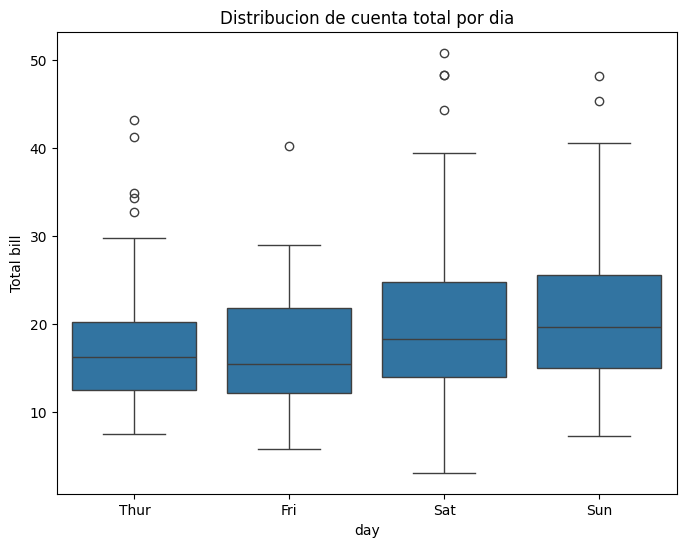

In [10]:
#Total bill agrupada por dia
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=data)
plt.title('Distribucion de cuenta total por dia')
plt.xlabel('day')
plt.ylabel('Total bill')
plt.show()

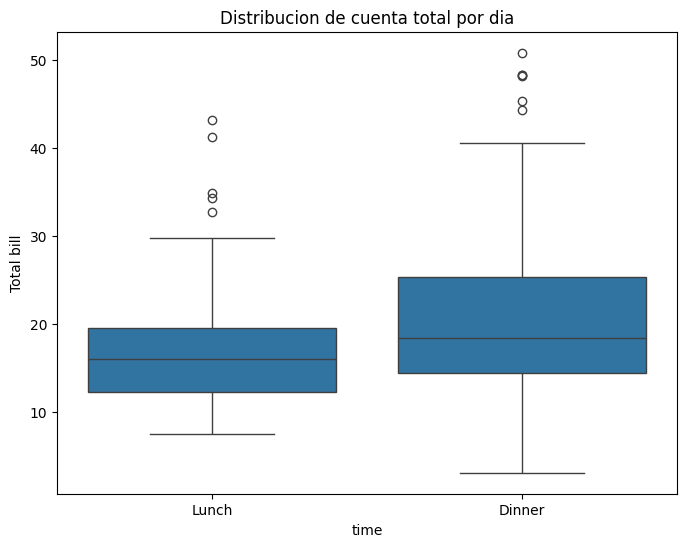

In [11]:
#Total bill agrupada por time
plt.figure(figsize=(8,6))
sns.boxplot(x='time', y='total_bill', data=data)
plt.title('Distribucion de cuenta total por dia')
plt.xlabel('time')
plt.ylabel('Total bill')
plt.show()

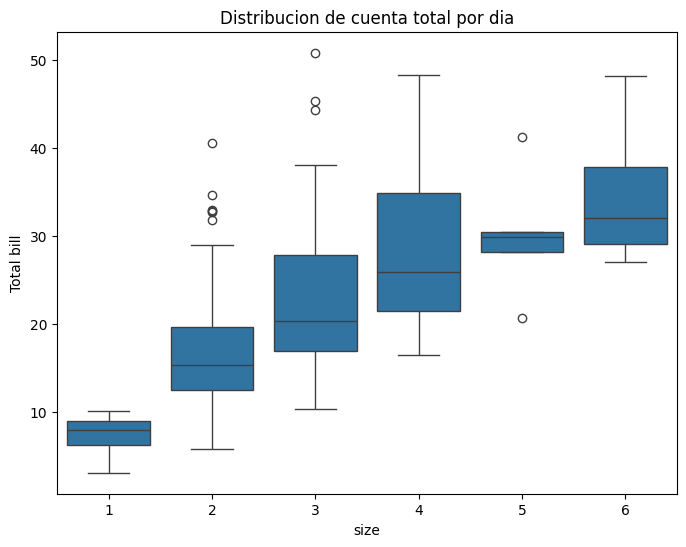

In [12]:
#Total bill agrupada por size
plt.figure(figsize=(8,6))
sns.boxplot(x='size', y='total_bill', data=data)
plt.title('Distribucion de cuenta total por dia')
plt.xlabel('size')
plt.ylabel('Total bill')
plt.show()

In [13]:
data = pd.get_dummies(data, columns=['day','time', 'smoker'], drop_first=True)
data.head()

,total_bill,size,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
0,16.99,2,False,False,True,True,True
1,10.34,3,False,False,True,True,True
2,21.01,3,False,False,True,True,True
3,23.68,2,False,False,True,True,True
4,24.59,4,False,False,True,True,True


In [14]:
data = data.astype({col:'int64' for col in data.select_dtypes(include=['bool']).columns})

In [15]:
data.head()

,total_bill,size,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
0,16.99,2,0,0,1,1,1
1,10.34,3,0,0,1,1,1
2,21.01,3,0,0,1,1,1
3,23.68,2,0,0,1,1,1
4,24.59,4,0,0,1,1,1


In [16]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [17]:
data.head()

,total_bill,size,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
0,16.99,2,0,0,1,1,1
1,10.34,3,0,0,1,1,1
2,21.01,3,0,0,1,1,1
3,23.68,2,0,0,1,1,1
4,24.59,4,0,0,1,1,1


In [18]:
data.head()

,total_bill,size,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
0,16.99,2,0,0,1,1,1
1,10.34,3,0,0,1,1,1
2,21.01,3,0,0,1,1,1
3,23.68,2,0,0,1,1,1
4,24.59,4,0,0,1,1,1


In [19]:
train.head()

,total_bill,size,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
228,13.28,2,0,1,0,1,1
208,24.27,2,0,1,0,1,0
96,27.28,2,1,0,0,1,0
167,31.71,4,0,0,1,1,1
84,15.98,2,0,0,0,0,1


In [20]:
test.head()

,total_bill,size,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
24,19.82,2,0,1,0,1,1
6,8.77,2,0,0,1,1,1
153,24.55,4,0,0,1,1,1
211,25.89,4,0,1,0,1,0
198,13.00,2,0,0,0,0,0


In [21]:
X_train = train.drop('total_bill', axis=1)
X_train = sm.add_constant(X_train)
y_train = train['total_bill']

In [22]:
X_train.head()

,const,size,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
228,1.0,2,0,1,0,1,1
208,1.0,2,0,1,0,1,0
96,1.0,2,1,0,0,1,0
167,1.0,4,0,0,1,1,1
84,1.0,2,0,0,0,0,1


In [23]:
lm_model_1 = sm.OLS(y_train, X_train).fit()

In [24]:
sigVars = lm_model_1.pvalues < 0.05

In [25]:
sigVars

const           True
size            True
day_Fri        False
day_Sat        False
day_Sun        False
time_Dinner     True
smoker_No       True
dtype: bool

In [26]:
lm_model_1.rsquared

np.float64(0.38286627247881144)

In [27]:
lm_model_1.rsquared_adj

np.float64(0.3631705152174969)

In [28]:
metrics.mean_squared_error(y_train, lm_model_1.predict(X_train))

np.float64(47.22756575821389)

In [29]:
metrics.mean_absolute_error(y_train, lm_model_1.predict(X_train))

np.float64(5.3093807047071655)

In [30]:
metrics.mean_absolute_percentage_error(y_train, lm_model_1.predict(X_train))

np.float64(0.29305278797278306)

In [31]:
X_train_2 = X_train.drop(['day_Fri','day_Sat','day_Sun'], axis=1)

In [32]:
lm_model_2 = sm.OLS(y_train, X_train_2).fit()

In [33]:
print(lm_model_2.rsquared)
print(lm_model_2.rsquared_adj)
print(metrics.mean_squared_error(y_train, lm_model_2.predict(X_train_2)))
print(metrics.mean_absolute_error(y_train, lm_model_2.predict(X_train_2)))
print(metrics.mean_absolute_percentage_error(y_train, lm_model_2.predict(X_train_2)))

0.37459878972439653
0.36477573406561736
47.86025372846524
5.402455854314513
0.2987591279051475


In [34]:
def backward_selection(data, target, initial_vars=None):

    if initial_vars is None:
        initial_vars = data.columns.drop([target]).tolist()

    selected = initial_vars.copy()

    X = sm.add_constant(data[selected])
    current_aic = sm.OLS(data[target], X).fit().aic
    best_aic = current_aic

    while len(selected) > 1:

        aic_values = []

        for predictor in selected:
            temp_vars = selected.copy()
            temp_vars.remove(predictor)

            X = sm.add_constant(data[temp_vars])
            model = sm.OLS(data[target], X).fit()
            aic = model.aic
            aic_values.append((predictor, aic))

        aic_values.sort(key=lambda x:x[1])
        worst_predictor, best_aic = aic_values[0]
    
        if best_aic < current_aic:
            selected.remove(worst_predictor)
            current_aic = best_aic
        else:
            break

    X = sm.add_constant(data[selected])
    model = sm.OLS(data[target], X).fit()

    return model, selected

In [35]:
model, var_selected = backward_selection(data, 'total_bill')

In [36]:
var_selected

['size', 'time_Dinner', 'smoker_No']

In [37]:
X_train_back = X_train[var_selected]

In [38]:
lm_model_3 = sm.OLS(y_train, X_train_back).fit()

In [39]:
print(lm_model_3.rsquared)
print(lm_model_3.rsquared_adj)
print(metrics.mean_squared_error(y_train, lm_model_3.predict(X_train_back)))
print(metrics.mean_absolute_error(y_train, lm_model_3.predict(X_train_back)))
print(metrics.mean_absolute_percentage_error(y_train, lm_model_3.predict(X_train_back)))

0.8943217885808068
0.8926705665273819
51.28377210905478
5.527468938978438
0.2885419827712677


In [40]:
print(lm_model_3.summary())

                                 OLS Regression Results                                
Dep. Variable:             total_bill   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              541.6
Date:                Fri, 30 Aug 2024   Prob (F-statistic):                    2.11e-93
Time:                        09:20:25   Log-Likelihood:                         -660.59
No. Observations:                 195   AIC:                                      1327.
Df Residuals:                     192   BIC:                                      1337.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [41]:
X_test = test.drop('total_bill', axis=1)
X_test = sm.add_constant(X_test)
y_test = test['total_bill']

In [42]:
pred_1 = lm_model_1.predict(X_test)

In [44]:
X_test_2 = X_test.drop(['day_Fri','day_Sat','day_Sun'], axis=1)
pred_2 = lm_model_2.predict(X_test_2)

In [45]:
X_test_back = X_test[var_selected]
pred_3 = lm_model_3.predict(X_test_back)

In [46]:
print(metrics.mean_absolute_percentage_error(y_test, pred_1))
print(metrics.mean_absolute_percentage_error(y_test, pred_2))
print(metrics.mean_absolute_percentage_error(y_test, pred_3))

0.4362319251597374
0.4283445827579153
0.3878744906189409
